<a href="https://colab.research.google.com/github/ricardosaj/Bootcamp-Data-Science-Alura/blob/main/SuperDesafioModulo03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROPOSTA DE PROJETO DO SUPER DESAFIO DO MÓDULO 03 - BOOTCAMP ALURA DE DATA SCIENCE

Nesse projeto, utilizaremos bibliotecas de previsão para a criação de um modelo capaz de prever a quantidade de óbitos nos próximos meses do RJ. 
Minha proposta é analisar 1 ano na frente dos dados que temos.

Utilizamos como DataBase as informações do site https://brasil.io/dataset/covid19/caso_full/

  Conclusões no final desse código

In [1]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 2.6 MB/s 
     |████████████████████████████████| 155 kB 7.7 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/ricardosaj/Bootcamp-Data-Science-Alura/main/obito_cartorio.csv")
df.head()

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
0,2020-01-01,AC,1,1,0,2,4,3,1,0,0,1,1,8,2,2,0,10,14,NaN,2.0,4.0,3.0,1.0,NaN,NaN,1.0,1.0,8.0,2.0,2.0,NaN,10,14
1,2020-01-02,AC,1,1,0,2,10,3,2,0,0,1,1,14,4,4,0,17,24,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,6.0,2.0,2.0,NaN,7,10
2,2020-01-03,AC,1,1,0,2,16,3,4,0,0,1,1,22,7,6,0,25,37,NaN,NaN,6.0,NaN,2.0,NaN,NaN,NaN,NaN,8.0,3.0,2.0,NaN,8,13
3,2020-01-04,AC,1,1,0,2,18,6,5,0,0,1,2,26,7,7,0,31,43,NaN,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,4.0,NaN,1.0,NaN,6,6
4,2020-01-05,AC,1,2,0,2,24,7,5,0,0,1,3,30,11,7,0,38,52,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,1.0,4.0,4.0,NaN,NaN,7,9


In [8]:
df.state.unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [10]:
df.columns

Index(['date', 'state', 'epidemiological_week_2019',
       'epidemiological_week_2020', 'deaths_indeterminate_2019',
       'deaths_respiratory_failure_2019', 'deaths_others_2019',
       'deaths_pneumonia_2019', 'deaths_septicemia_2019', 'deaths_sars_2019',
       'deaths_covid19', 'deaths_indeterminate_2020',
       'deaths_respiratory_failure_2020', 'deaths_others_2020',
       'deaths_pneumonia_2020', 'deaths_septicemia_2020', 'deaths_sars_2020',
       'deaths_total_2019', 'deaths_total_2020',
       'new_deaths_indeterminate_2019', 'new_deaths_respiratory_failure_2019',
       'new_deaths_others_2019', 'new_deaths_pneumonia_2019',
       'new_deaths_septicemia_2019', 'new_deaths_sars_2019',
       'new_deaths_covid19', 'new_deaths_indeterminate_2020',
       'new_deaths_respiratory_failure_2020', 'new_deaths_others_2020',
       'new_deaths_pneumonia_2020', 'new_deaths_septicemia_2020',
       'new_deaths_sars_2020', 'new_deaths_total_2019',
       'new_deaths_total_2020'],
    

In [13]:
df.dtypes

date                                    object
state                                   object
epidemiological_week_2019                int64
epidemiological_week_2020                int64
deaths_indeterminate_2019                int64
deaths_respiratory_failure_2019          int64
deaths_others_2019                       int64
deaths_pneumonia_2019                    int64
deaths_septicemia_2019                   int64
deaths_sars_2019                         int64
deaths_covid19                           int64
deaths_indeterminate_2020                int64
deaths_respiratory_failure_2020          int64
deaths_others_2020                       int64
deaths_pneumonia_2020                    int64
deaths_septicemia_2020                   int64
deaths_sars_2020                         int64
deaths_total_2019                        int64
deaths_total_2020                        int64
new_deaths_indeterminate_2019          float64
new_deaths_respiratory_failure_2019    float64
new_deaths_ot

In [14]:
rj = df[df['state']=='RJ']
rj['date']= pd.to_datetime(rj['date'])
rj.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
6588,2020-01-01,RJ,1,1,0,23,217,78,64,2,0,5,38,242,89,67,1,384,442,NaN,23.0,217.0,78.0,64.0,2.0,NaN,5.0,38.0,242.0,89.0,67.0,1.0,384,442
6589,2020-01-02,RJ,1,1,0,40,433,134,125,2,0,9,62,458,159,130,2,734,820,NaN,17.0,216.0,56.0,61.0,NaN,NaN,4.0,24.0,216.0,70.0,63.0,1.0,350,378
6590,2020-01-03,RJ,1,1,0,61,656,200,203,5,0,13,91,672,230,191,2,1125,1199,NaN,21.0,223.0,66.0,78.0,3.0,NaN,4.0,29.0,214.0,71.0,61.0,NaN,391,379
6591,2020-01-04,RJ,1,1,1,85,907,262,291,5,0,20,113,859,299,253,2,1551,1546,1.0,24.0,251.0,62.0,88.0,NaN,NaN,7.0,22.0,187.0,69.0,62.0,NaN,426,347
6592,2020-01-05,RJ,1,2,2,113,1102,322,374,6,0,24,137,1052,369,310,2,1919,1894,1.0,28.0,195.0,60.0,83.0,1.0,NaN,4.0,24.0,193.0,70.0,57.0,NaN,368,348


In [16]:
rj.dtypes

date                                   datetime64[ns]
state                                          object
epidemiological_week_2019                       int64
epidemiological_week_2020                       int64
deaths_indeterminate_2019                       int64
deaths_respiratory_failure_2019                 int64
deaths_others_2019                              int64
deaths_pneumonia_2019                           int64
deaths_septicemia_2019                          int64
deaths_sars_2019                                int64
deaths_covid19                                  int64
deaths_indeterminate_2020                       int64
deaths_respiratory_failure_2020                 int64
deaths_others_2020                              int64
deaths_pneumonia_2020                           int64
deaths_septicemia_2020                          int64
deaths_sars_2020                                int64
deaths_total_2019                               int64
deaths_total_2020           

<function matplotlib.pyplot.show>

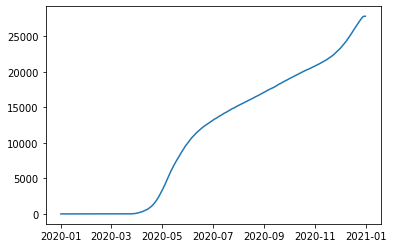

In [19]:
plt.plot(rj['date'], rj['deaths_covid19'])
plt.show

In [20]:
data = rj[['date', 'deaths_covid19']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



,ds,y
6588,2020-01-01,0
6589,2020-01-02,0
6590,2020-01-03,0
6591,2020-01-04,0
6592,2020-01-05,0


In [21]:
data.tail()

,ds,y
6949,2020-12-27,27583
6950,2020-12-28,27714
6951,2020-12-29,27797
6952,2020-12-30,27811
6953,2020-12-31,27811


In [22]:
m = NeuralProphet()
m.fit(data, freq='D', epochs=1000)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/228 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E-01, min: 3.41E+00


  0%|          | 0/228 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.38E-02, min: 1.97E+00


  0%|          | 0/228 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.16E-01, min: 1.80E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.70E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:42<00:00, 23.52it/s, SmoothL1Loss=5.34e-5, MAE=171, RMSE=249, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.375450,19976.391586,21983.221685,0.0
1,0.358180,19455.457714,21443.482945,0.0
2,0.341521,18946.552617,20892.804079,0.0
3,0.324974,18446.302233,20351.358414,0.0
4,0.308217,17932.016436,19828.595084,0.0
...,...,...,...,...
995,0.000053,171.407853,254.469083,0.0
996,0.000053,171.364516,252.744965,0.0
997,0.000053,171.359425,252.947768,0.0
998,0.000053,171.353486,254.640837,0.0


quando o modelo indica que MAE=171, significa que a margem de erro são 171 mortes para mais ou para menos.

In [26]:
future = m.make_future_dataframe(data, periods=360)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_weekly
0,2021-01-01,None,27344.773438,NaN,27349.625000,-4.852289
1,2021-01-02,None,27455.724609,NaN,27460.337891,-4.612782
2,2021-01-03,None,27568.867188,NaN,27571.042969,-2.174928
3,2021-01-04,None,27682.458984,NaN,27681.751953,0.706210
4,2021-01-05,None,27794.691406,NaN,27792.458984,2.233612


In [27]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly
355,2021-12-22,None,66655.718750,NaN,66651.187500,4.533240
356,2021-12-23,None,66766.062500,NaN,66761.890625,4.166937
357,2021-12-24,None,66867.750000,NaN,66872.601562,-4.852289
358,2021-12-25,None,66978.695312,NaN,66983.312500,-4.612782
359,2021-12-26,None,67091.851562,NaN,67094.023438,-2.174928


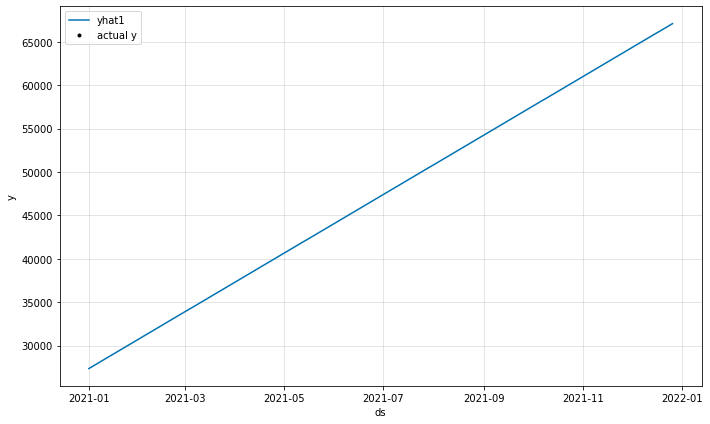

In [28]:
plot1 = m.plot(forecast)

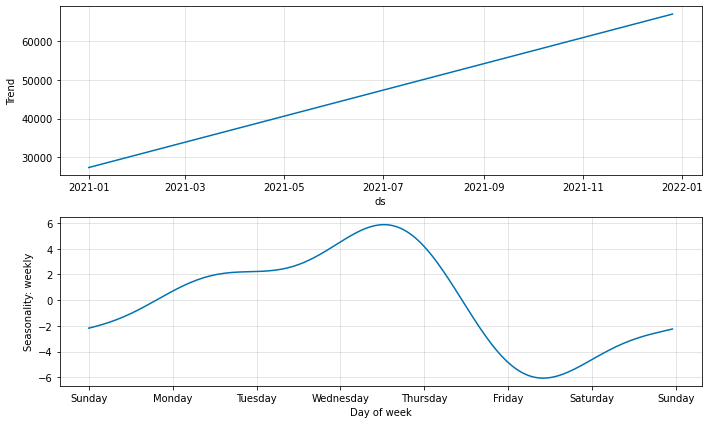

In [30]:
plot2 = m.plot_components(forecast)

Ficou provado que o modelo funciona, e pode prever a quantidade de óbitos no estado do RJ para pelo menos 1 ano na frente.

Como os dados de input foram poucos (somente de 01/2020 até 01/2021), o modelo entendeu que a taxa bizarra de crescimento se manteria para os anos seguintes.
Caso tivessemos mais informações, como as alterações nas taxas de óbitos após a vacinação da população do RJ, veríamos uma taxa de crescimento menor e consequentemente menos mortes totais.

Caso seja do interesse, é possível analisar outros parâmetros desses dados pois o DataBase conta com outros dados diferentes. A minha proposta foi realmente de analisar puramente a previsão de quantidade total de mortes por covid no RJ.

De qualquer forma, o modelo se mostrou funcional quando fez sentido a variação da taxa em relação aos dados de 1 ano contidos nele. 
Fica interessante análisar também que no último plot, mostra a relação da quantidade por dias da semana, e os dias do meio da semana apresentam maior taxa. Isso faz sentido já que sabemos que os dados não são contabilizados corretamente durante os finais de semana! 

